In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import seaborn
from sklearn import preprocessing
from sklearn.externals import joblib

%matplotlib inline
%load_ext autoreload
%autoreload 2

from scripts.data_mining import *

In [2]:
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

# VoroMQA

In [3]:
method_scores = pd.read_csv('datasets_VoroMQA.txt', sep=' ', header=None, names=['name', 'score'], usecols=[0, 1])
method_scores.index = np.array(method_scores.name)
method_scores = pd.Series(method_scores.score)
method_scores.head()

../../datasets/CASP/data/CASP11Stage1/T0759/T0759.pdb       0.355418
../../datasets/CASP/data/CASP11Stage1/T0759/server20_TS1    0.121425
../../datasets/CASP/data/CASP11Stage1/T0759/server19_TS1    0.173172
../../datasets/CASP/data/CASP11Stage1/T0759/server18_TS1    0.415116
../../datasets/CASP/data/CASP11Stage1/T0759/server17_TS1    0.300855
Name: score, dtype: float64

## Stage 1

In [4]:
X, scores = get_dataset(
    [('*coarsegrained-d4-b10-a8-c0-n0--skip_errors.mat',
      '1cd14716250c6c3ab01f68357608f717',
      lambda X: X)],
    '^.*CASP11Stage1/T..../.*$'
)
X = np.array(scores.index).reshape(-1, 1)

### including native

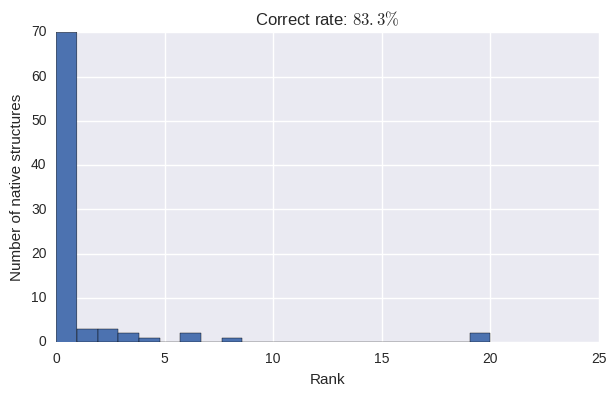

RMSD   TM-score MaxSub-score GDT-TS-score  \
Mean rank of the native  0.940476   0.940476     0.940476     0.940476   
Top 1                    0.833333   0.833333     0.833333     0.833333   
Top 5                    0.940476   0.940476     0.940476     0.940476   
Mean score for top 1       1.8068   0.917202     0.902519     0.911136   
Mean loss score           -1.8068  0.0827976     0.097481    0.0888643   
Mean Pearson             0.669473   -0.72437    -0.697664    -0.713837   
Mean Spearman            0.516481  -0.550093    -0.505674    -0.541141   
PMCC                     0.502436  -0.780342    -0.738315     -0.74354   
SMCC                     0.665648  -0.780838    -0.716012    -0.717867   
wmPMCC                   0.721085  -0.781827    -0.747451    -0.765007   
wmSMCC                   0.557262  -0.590618    -0.545976    -0.576242   
sum Z-score                  -144    217.128      243.773      240.398   
mean Z-score             -1.71429    2.58486      2.90206      2.86188   

                        GDT-HA-score RMSD-backwards TM-score-backwards  \
Mean rank of the native     0.940476        17.5595           0.940476   
Top 1                       0.833333              0           0.833333   
Top 5                       0.940476      0.0238095           0.940476   
Mean score for top 1        0.888886         1.8068           0.912381   
Mean loss score             0.111114        47.1459           0.087619   
Mean Pearson               -0.669611       0.669473          -0.722155   
Mean Spearman              -0.517239       0.516342          -0.553448   
PMCC                       -0.699569       0.502436          -0.783993   
SMCC                       -0.700912       0.665532          -0.781107   
wmPMCC                     -0.706159       0.721085          -0.779837   
wmSMCC                     -0.555125       0.556939          -0.593976   
sum Z-score                      272           -144            225.514   
mean Z-score                 3.23809       -1.71429             2.6847   

                        MaxSub-score-backwards GDT-TS-score-backwards  \
Mean rank of the native               0.940476               0.940476   
Top 1                                 0.833333               0.833333   
Top 5                                 0.940476               0.940476   
Mean score for top 1                  0.897435               0.905698   
Mean loss score                       0.102565              0.0943024   
Mean Pearson                         -0.691922              -0.707078   
Mean Spearman                        -0.510158              -0.544001   
PMCC                                 -0.743579               -0.74876   
SMCC                                 -0.717699              -0.719618   
wmPMCC                               -0.739876              -0.756707   
wmSMCC                               -0.548065              -0.578393   
sum Z-score                            250.512                247.922   
mean Z-score                           2.98228                2.95145   

                        GDT-HA-score-backwards  
Mean rank of the native               0.940476  
Top 1                                 0.833333  
Top 5                                 0.940476  
Mean score for top 1                  0.884665  
Mean loss score                       0.115335  
Mean Pearson                         -0.661371  
Mean Spearman                        -0.520114  
PMCC                                 -0.701833  
SMCC                                 -0.702694  
wmPMCC                               -0.696518  
wmSMCC                               -0.556559  
sum Z-score                              276.3  
mean Z-score                           3.28928

In [5]:
results, _ = scoring_results(X, scores,
                             lambda indices: -method_scores.loc[indices.ravel()].values,
                             plot_score='GDT-TS-score')
results

### excluding native

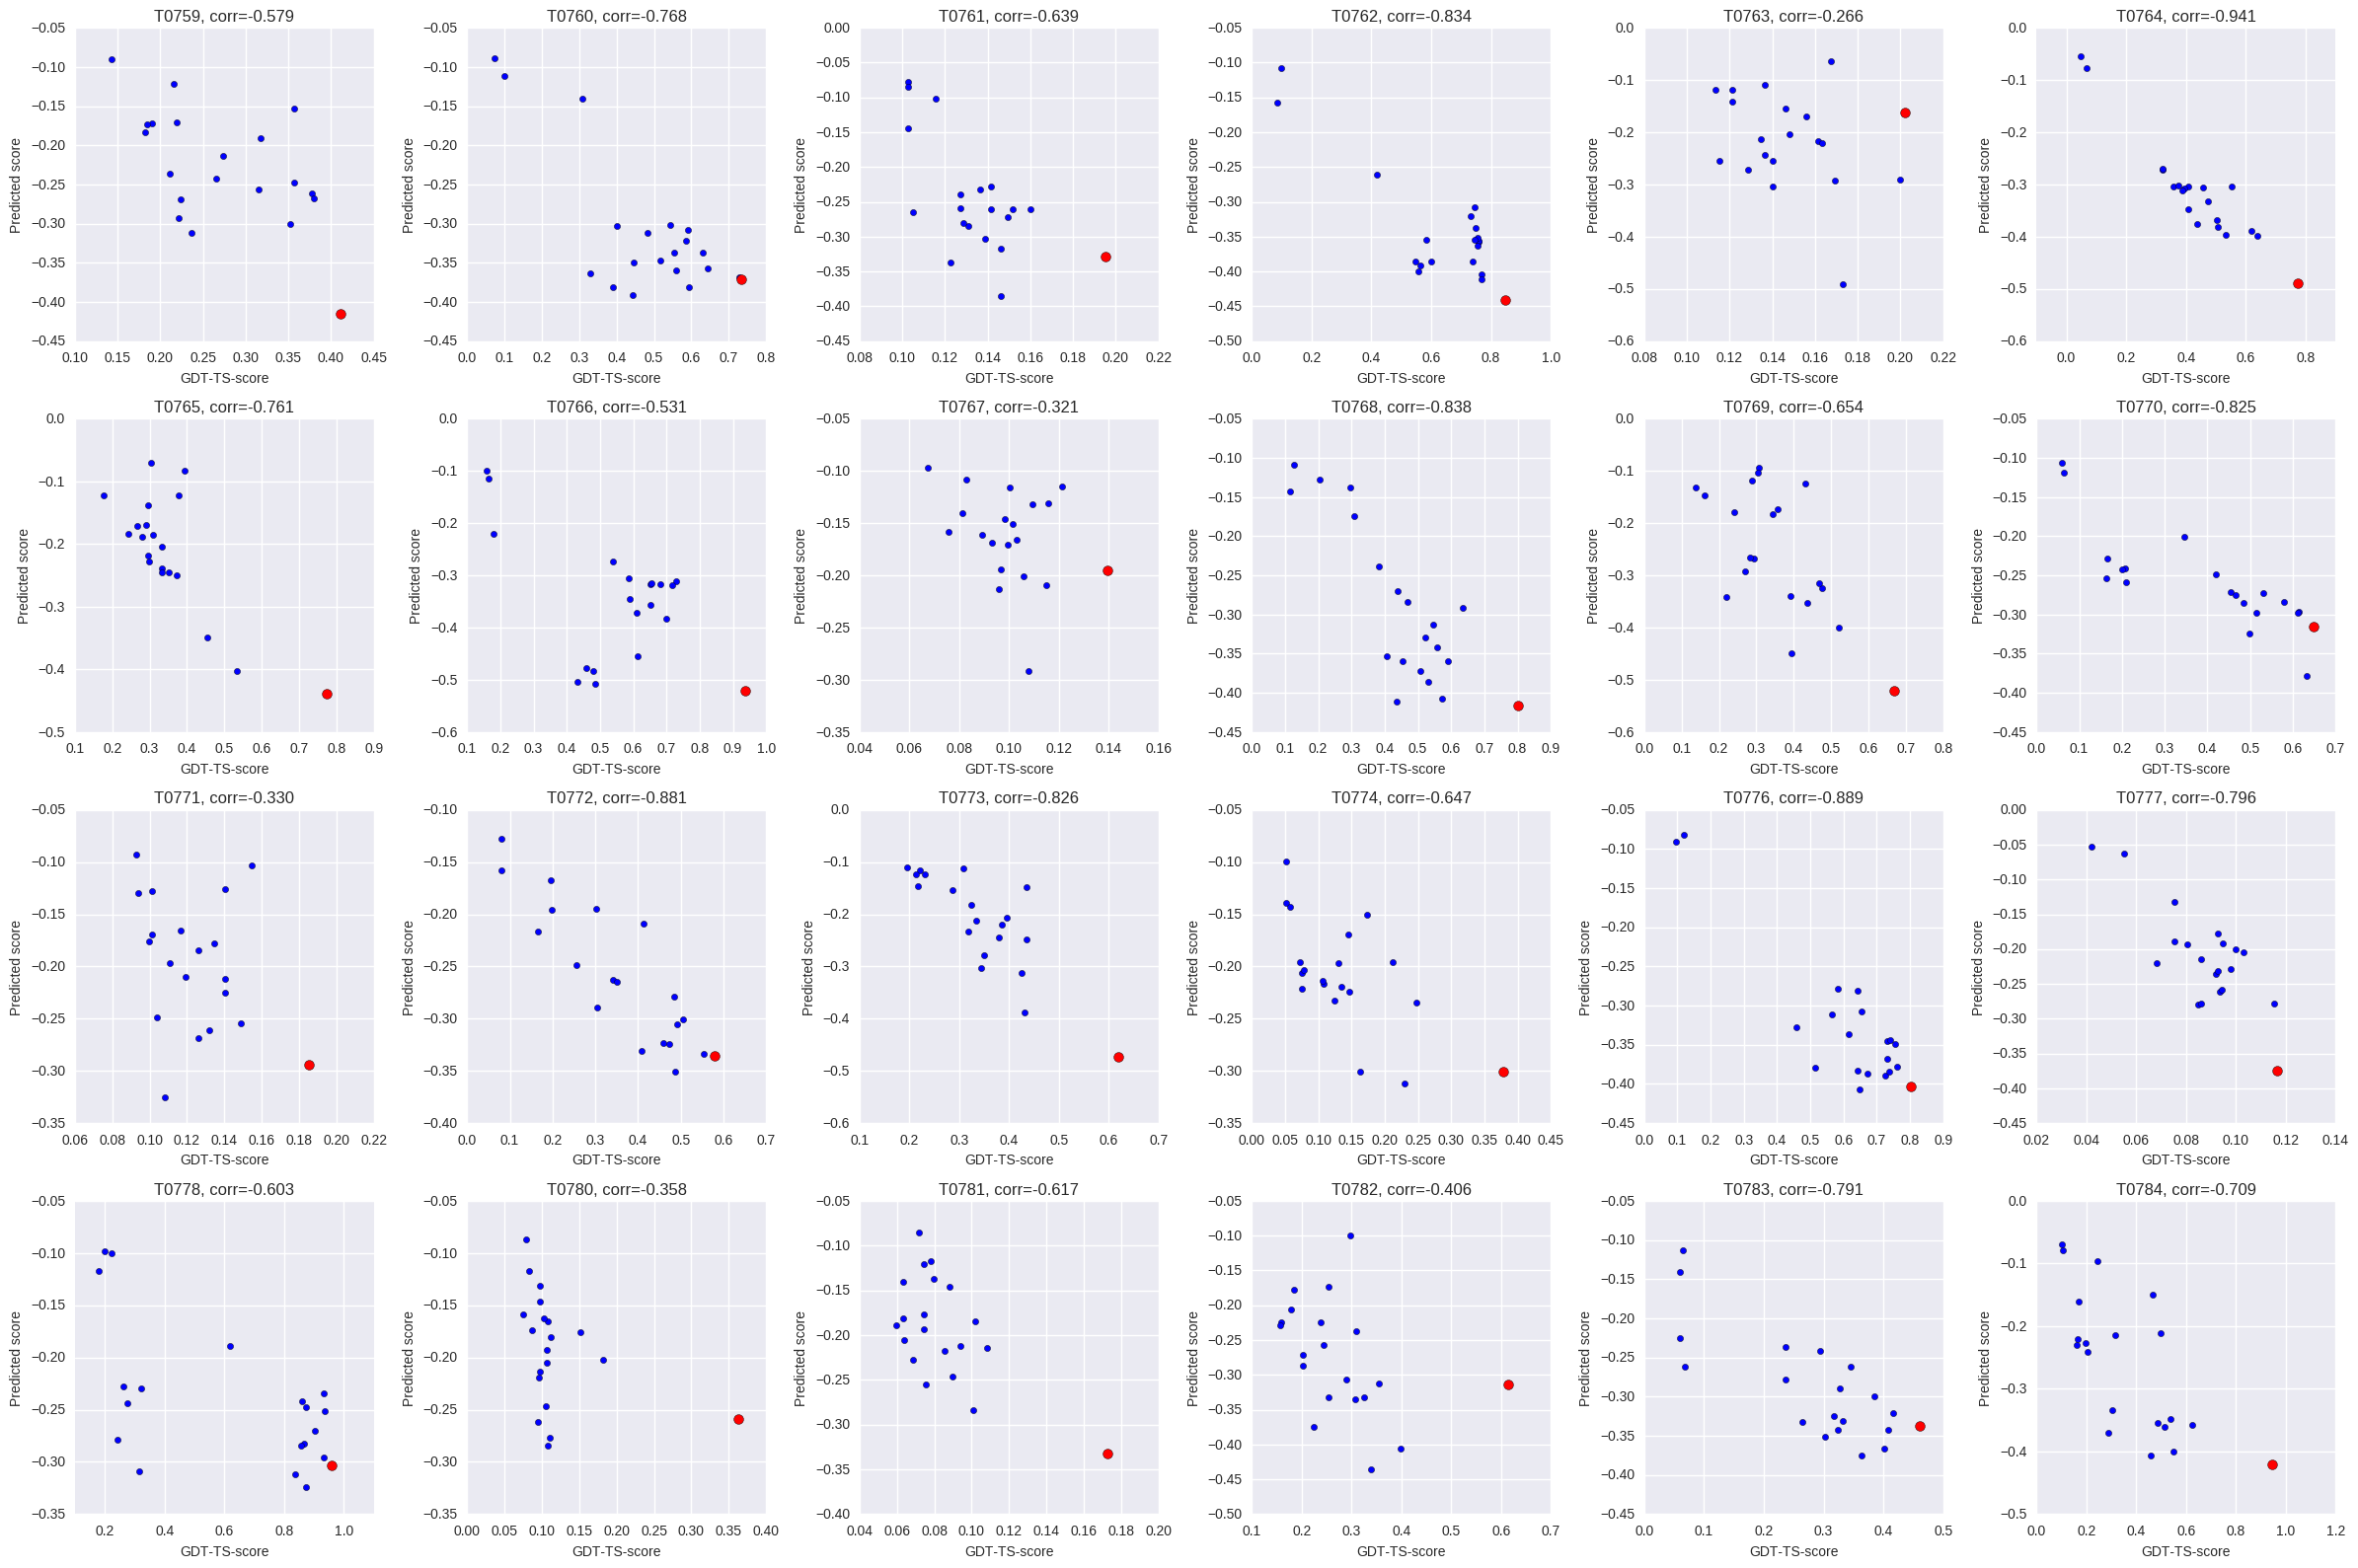

RMSD  TM-score MaxSub-score GDT-TS-score  \
Mean rank of the native   4.40476   3.14286      3.11905      2.86905   
Top 1                    0.297619  0.357143     0.369048     0.369048   
Top 5                    0.666667      0.75     0.738095     0.761905   
Mean score for top 1      11.1876  0.533211     0.403585     0.446562   
Mean loss score          -2.50065   0.08395    0.0940405    0.0863952   
Mean Pearson             0.587433 -0.639377    -0.570879    -0.617386   
Mean Spearman            0.453759 -0.492463    -0.441192     -0.48276   
PMCC                     0.468505 -0.749871    -0.694834    -0.701244   
SMCC                     0.628722 -0.761542    -0.686675     -0.68917   
wmPMCC                   0.651922 -0.706733     -0.63979     -0.68089   
wmSMCC                   0.495938 -0.533543    -0.481336    -0.517334   
sum Z-score              -67.1513   96.2428      100.531      103.963   
mean Z-score             -0.79942   1.14575       1.1968      1.23765   

                        GDT-HA-score RMSD-backwards TM-score-backwards  \
Mean rank of the native      3.08333        16.5833            3.40476   
Top 1                       0.333333              0           0.321429   
Top 5                       0.738095      0.0238095            0.72619   
Mean score for top 1         0.31231        11.1876           0.499465   
Mean loss score            0.0767155        37.7651          0.0791143   
Mean Pearson               -0.577595       0.587433          -0.641076   
Mean Spearman              -0.454762       0.453562          -0.496957   
PMCC                       -0.662075       0.468505          -0.753357   
SMCC                       -0.669364       0.628729          -0.762148   
wmPMCC                     -0.633416       0.651922          -0.706649   
wmSMCC                     -0.490849        0.49587          -0.537569   
sum Z-score                  104.389       -67.1513            94.8097   
mean Z-score                 1.24273       -0.79942            1.12869   

                        MaxSub-score-backwards GDT-TS-score-backwards  \
Mean rank of the native                3.40476                3.34524   
Top 1                                 0.333333               0.357143   
Top 5                                 0.714286               0.714286   
Mean score for top 1                  0.371825               0.411535   
Mean loss score                      0.0889464              0.0809488   
Mean Pearson                         -0.567629              -0.614285   
Mean Spearman                        -0.447154              -0.485553   
PMCC                                 -0.704085              -0.709804   
SMCC                                 -0.688984              -0.691288   
wmPMCC                               -0.634281              -0.675705   
wmSMCC                               -0.484415               -0.51966   
sum Z-score                            99.2687                102.734   
mean Z-score                           1.18177                1.22303   

                        GDT-HA-score-backwards  
Mean rank of the native                3.47619  
Top 1                                 0.333333  
Top 5                                 0.714286  
Mean score for top 1                  0.287167  
Mean loss score                      0.0713369  
Mean Pearson                         -0.573963  
Mean Spearman                        -0.460974  
PMCC                                 -0.675372  
SMCC                                 -0.671426  
wmPMCC                               -0.628194  
wmSMCC                               -0.493341  
sum Z-score                            103.003  
mean Z-score                           1.22622

In [6]:
results, _ = scoring_results(X[~get_natives(scores).values], scores[~get_natives(scores).values],
                             lambda indices: -method_scores.loc[indices.ravel()].values,
                             plot_score='GDT-TS-score')
results

## Stage 2

In [7]:
X, scores = get_dataset(
    [('*coarsegrained-d4-b10-a8-c0-n0--skip_errors.mat',
      '1cd14716250c6c3ab01f68357608f717',
      lambda X: X)],
    '^.*CASP11Stage2/T..../.*$'
)
X = np.array(scores.index).reshape(-1, 1)

### including native

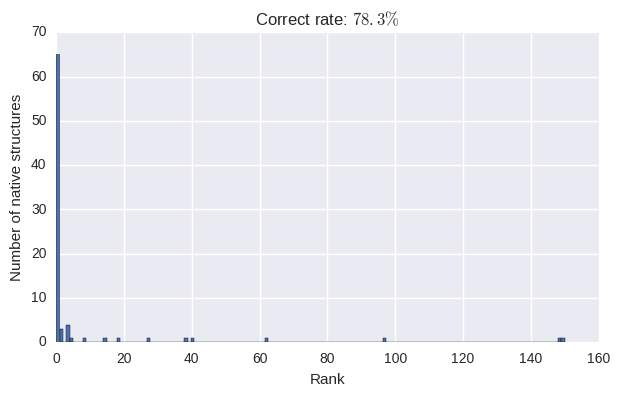

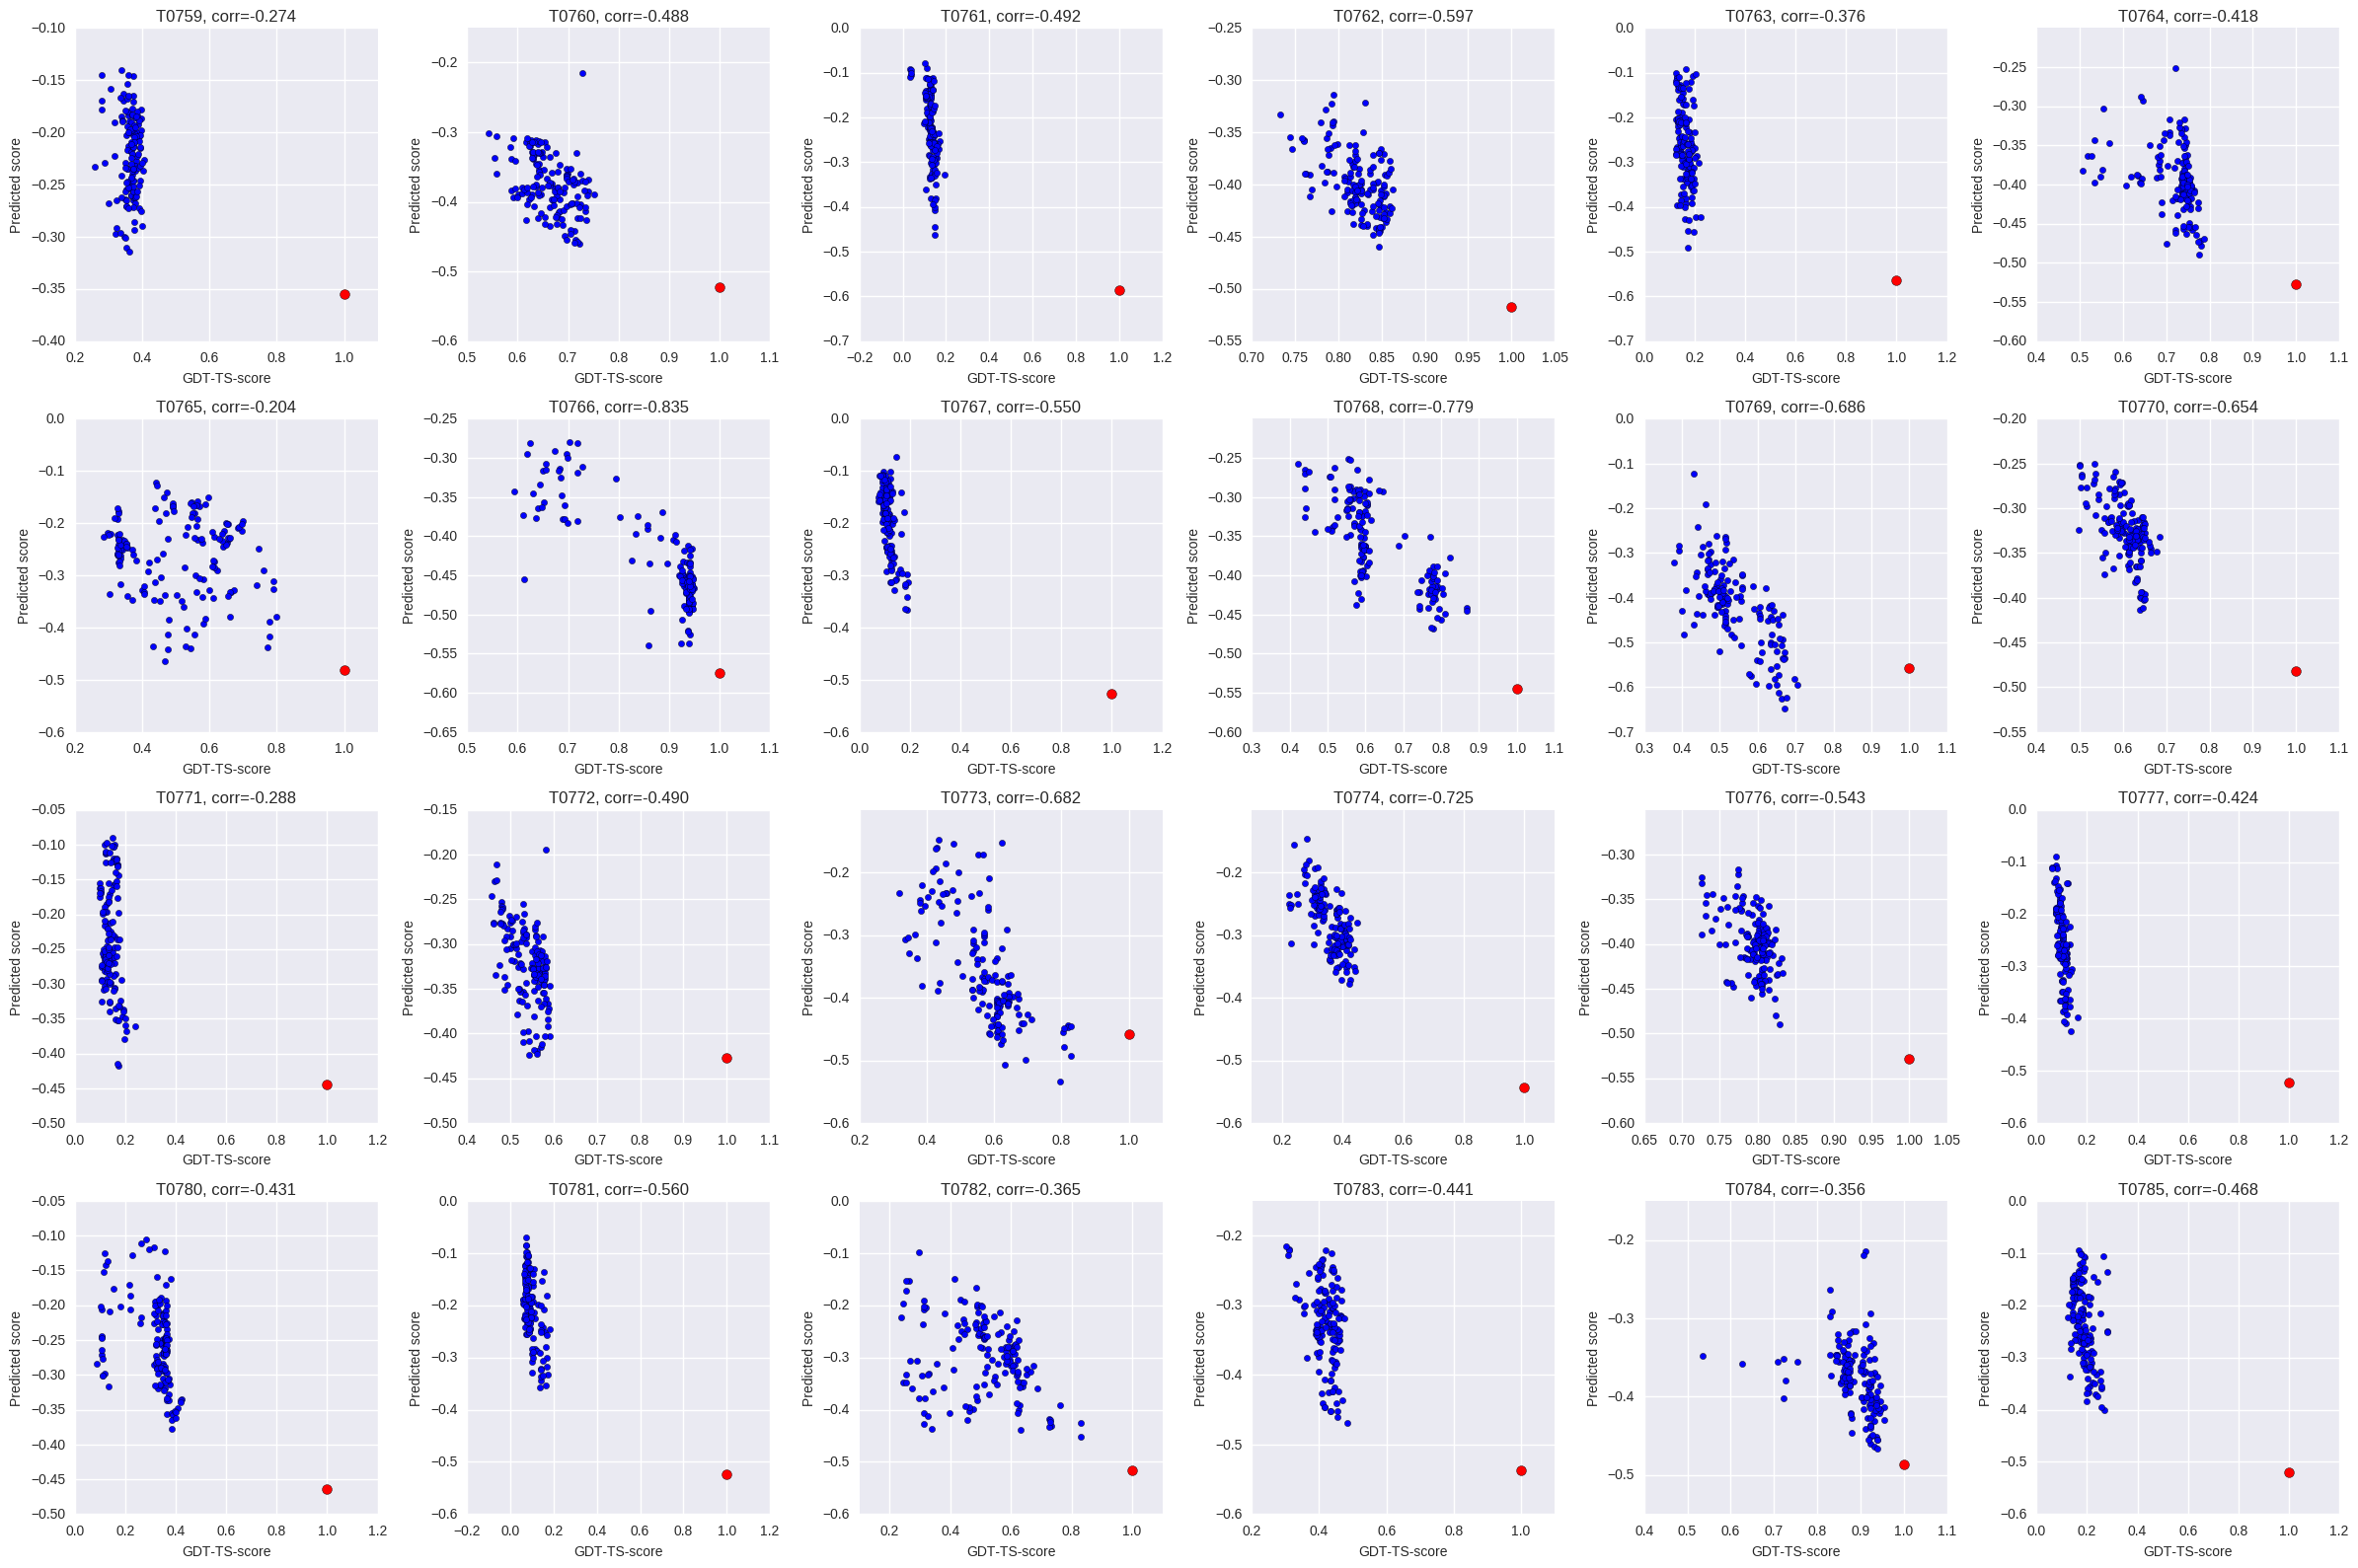

RMSD   TM-score MaxSub-score GDT-TS-score  \
Mean rank of the native   7.49398    7.49398      7.49398      7.49398   
Top 1                    0.783133   0.783133     0.783133     0.783133   
Top 5                    0.879518   0.879518     0.879518     0.879518   
Mean score for top 1      1.88195   0.913218      0.89633     0.905217   
Mean loss score          -1.88195  0.0867819      0.10367    0.0947831   
Mean Pearson             0.348387  -0.457399      -0.4387    -0.457918   
Mean Spearman            0.333901  -0.419844     -0.38724    -0.423451   
PMCC                     0.454123  -0.712916    -0.669119    -0.674128   
SMCC                      0.66558  -0.744489    -0.699324    -0.706323   
wmPMCC                   0.361572  -0.478278    -0.460729     -0.47824   
wmSMCC                   0.348491  -0.443204    -0.410512    -0.445775   
sum Z-score              -233.301    447.372      513.654      513.039   
mean Z-score             -2.81086    5.39003       6.1886      6.18119   

                        GDT-HA-score RMSD-backwards TM-score-backwards  \
Mean rank of the native      7.49398        117.759            7.49398   
Top 1                       0.783133              0           0.783133   
Top 5                       0.879518      0.0120482           0.879518   
Mean score for top 1        0.876423        1.88195           0.910234   
Mean loss score             0.123577        39.3065          0.0897663   
Mean Pearson               -0.434888       0.348387          -0.449146   
Mean Spearman              -0.405034       0.333894          -0.414318   
PMCC                       -0.641112       0.454123          -0.725175   
SMCC                       -0.688558       0.665577          -0.751412   
wmPMCC                      -0.45151       0.361572          -0.469998   
wmSMCC                      -0.42554       0.348499          -0.437905   
sum Z-score                  617.684       -233.301             493.31   
mean Z-score                 7.44197       -2.81086            5.94349   

                        MaxSub-score-backwards GDT-TS-score-backwards  \
Mean rank of the native                7.49398                7.49398   
Top 1                                 0.783133               0.783133   
Top 5                                 0.879518               0.879518   
Mean score for top 1                  0.892984               0.901616   
Mean loss score                       0.107016              0.0983843   
Mean Pearson                         -0.433279              -0.448124   
Mean Spearman                        -0.379873                 -0.414   
PMCC                                 -0.691343              -0.697944   
SMCC                                 -0.716322              -0.725135   
wmPMCC                               -0.455442              -0.469413   
wmSMCC                               -0.403669              -0.437543   
sum Z-score                            546.702                548.335   
mean Z-score                           6.58677                6.60645   

                        GDT-HA-score-backwards  
Mean rank of the native                7.49398  
Top 1                                 0.783133  
Top 5                                 0.879518  
Mean score for top 1                  0.873651  
Mean loss score                       0.126349  
Mean Pearson                         -0.427949  
Mean Spearman                         -0.39803  
PMCC                                 -0.667036  
SMCC                                 -0.703897  
wmPMCC                               -0.445318  
wmSMCC                               -0.420496  
sum Z-score                            641.223  
mean Z-score                           7.72557

In [8]:
results, _ = scoring_results(X, scores,
                             lambda indices: -method_scores.loc[indices.ravel()].values,
                             plot_score='GDT-TS-score')
results

### excluding native

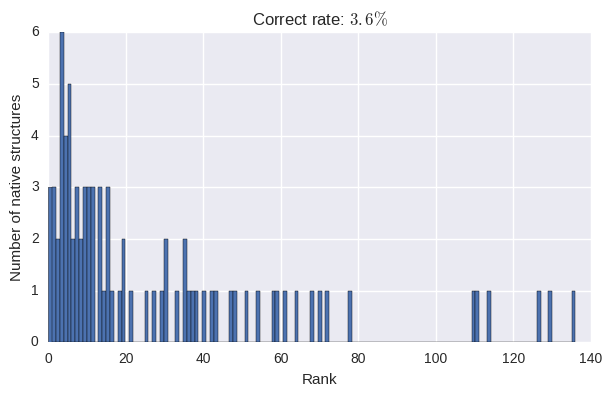

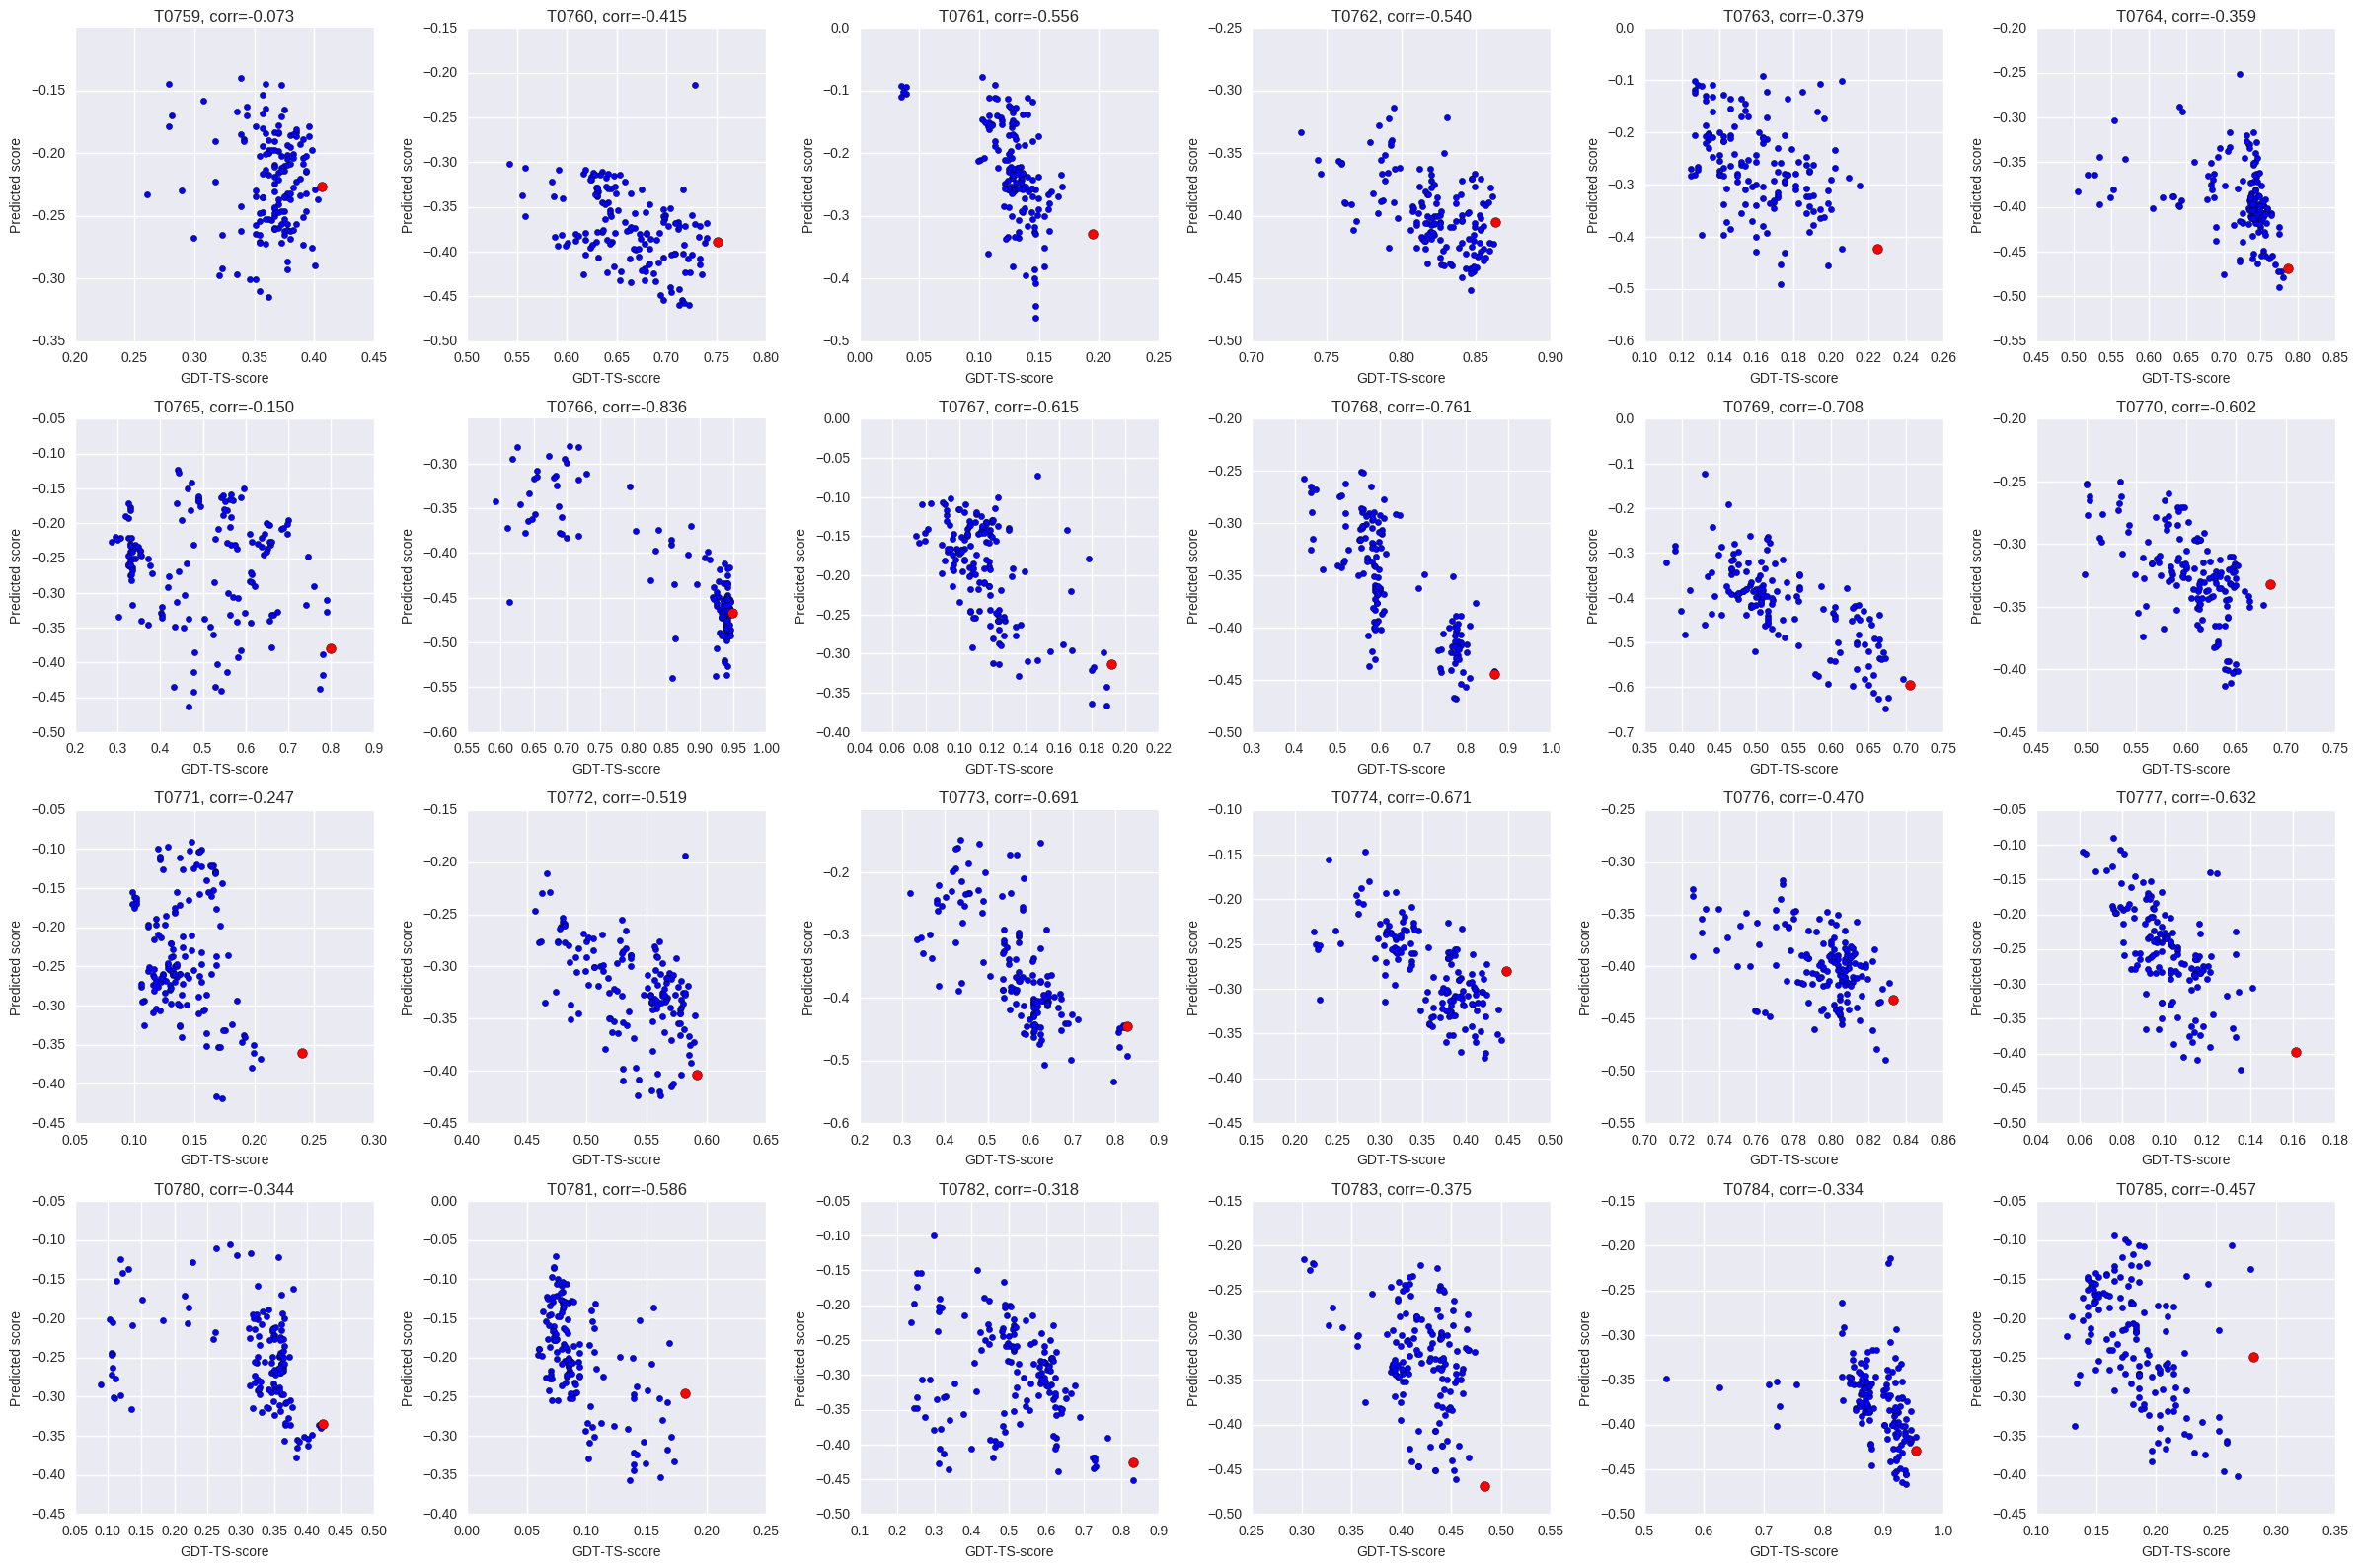

RMSD   TM-score MaxSub-score GDT-TS-score  \
Mean rank of the native    40.4578    32.6747      32.1566      28.1205   
Top 1                    0.0722892  0.0481928    0.0361446    0.0361446   
Top 5                     0.228916   0.240964      0.26506     0.216867   
Mean score for top 1       9.75945   0.592658     0.469198     0.509255   
Mean loss score           -3.25418  0.0759518    0.0787024     0.067288   
Mean Pearson              0.307041  -0.417752    -0.391427    -0.422122   
Mean Spearman             0.322442   -0.40994    -0.376741     -0.41359   
PMCC                      0.450709   -0.70985    -0.663901    -0.669149   
SMCC                      0.661453  -0.741856    -0.695804    -0.702934   
wmPMCC                    0.319843  -0.441482    -0.417519    -0.446608   
wmSMCC                    0.336906   -0.43334    -0.399947      -0.4353   
sum Z-score               -44.2004    62.9872       67.657      71.6344   
mean Z-score             -0.532535   0.758882     0.815144     0.863065   

                        GDT-HA-score RMSD-backwards TM-score-backwards  \
Mean rank of the native       33.253        116.783            37.7711   
Top 1                              0              0           0.060241   
Top 5                       0.192771      0.0120482           0.240964   
Mean score for top 1        0.367522        9.75945           0.562478   
Mean loss score             0.062088         31.429          0.0781831   
Mean Pearson               -0.412614       0.307041          -0.404136   
Mean Spearman              -0.394871       0.322413          -0.404244   
PMCC                        -0.63507       0.450709          -0.721821   
SMCC                       -0.684819       0.661453          -0.748923   
wmPMCC                     -0.436756       0.319843           -0.42916   
wmSMCC                     -0.415704       0.336909          -0.427864   
sum Z-score                  74.3178       -44.2004            75.5493   
mean Z-score                0.895396      -0.532535           0.910233   

                        MaxSub-score-backwards GDT-TS-score-backwards  \
Mean rank of the native                36.1807                35.2169   
Top 1                                0.0361446              0.0481928   
Top 5                                 0.289157               0.253012   
Mean score for top 1                  0.441318               0.477884   
Mean loss score                      0.0812988              0.0729446   
Mean Pearson                          -0.37335              -0.399865   
Mean Spearman                        -0.369251              -0.404345   
PMCC                                 -0.686519              -0.693337   
SMCC                                  -0.71311              -0.722086   
wmPMCC                               -0.401293              -0.427276   
wmSMCC                               -0.392801              -0.427446   
sum Z-score                            75.9627                 79.979   
mean Z-score                          0.915214               0.963602   

                        GDT-HA-score-backwards  
Mean rank of the native                36.4819  
Top 1                                0.0361446  
Top 5                                 0.228916  
Mean score for top 1                  0.345433  
Mean loss score                      0.0629373  
Mean Pearson                         -0.392948  
Mean Spearman                        -0.387766  
PMCC                                 -0.663242  
SMCC                                 -0.700461  
wmPMCC                               -0.420334  
wmSMCC                               -0.409842  
sum Z-score                            80.4037  
mean Z-score                          0.968719

In [9]:
results, _ = scoring_results(X[~get_natives(scores).values], scores[~get_natives(scores).values],
                             lambda indices: -method_scores.loc[indices.ravel()].values,
                             plot_score='GDT-TS-score')
results